In [1]:

from linares_plot import *
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format = 'png'

#### Load data

In [2]:
df_2_b = pd.read_excel('2_bumps_interference.xlsx') ## data of 2 simultaneous bumps
df_1_b = pd.read_excel('1_bump_drift.xlsx') ## data of 1 bump

### 2 bumps interference
You can find a regime where you have repulsion for closer eccentricity and attraction for far eccentricity

Plot the spectrum of interest

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


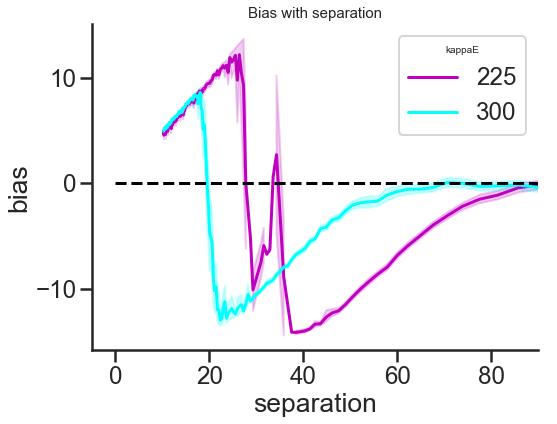

In [3]:
df = df_2_b.loc[df_2_b['success']==True] 
df = df[abs(df.bias)<1.5*np.std(df.bias)]

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)


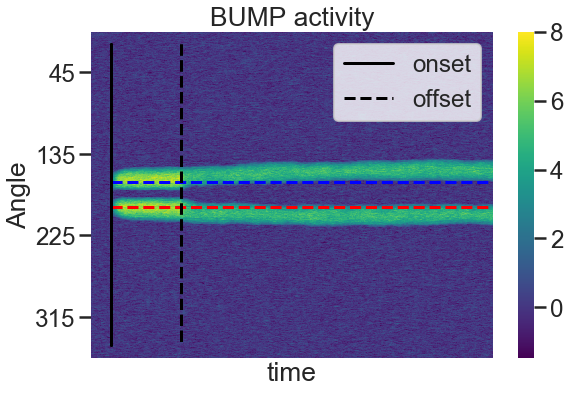

Simulation time: 27.1s


In [4]:
from model import *
r = model(totalTime=2000, targ_onset=100,  presentation_period=350, separation=13, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.9, sigI=1.6, kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False)

In [5]:
df.head(10)

bias  kappas_E  kappas_I  separation  success
0 -3.803062       300        30  240.000000     True
1 -1.044923       300        30  208.715953     True
2 -0.506969       300        30  184.647160     True
3  1.815913       300        30  165.555556     True
4  0.430735       300        30  150.041958     True
5 -0.217972       300        30  137.186701     True
6  3.369657       300        30  126.360424     True
7  0.168016       300        30  117.117904     True
8  2.064585       300        30  109.135300     True
9  0.865999       300        30  102.171429     True

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


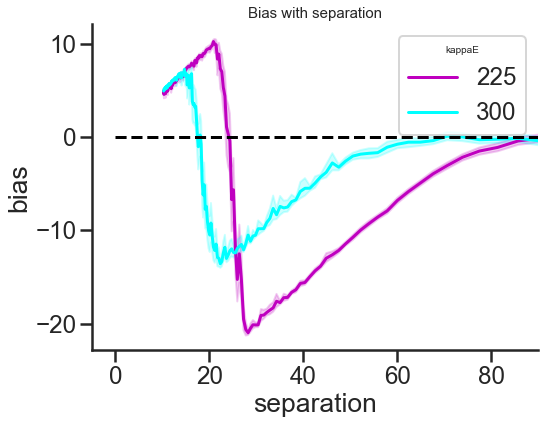

In [6]:
df = df_2_b.loc[df_2_b['success']==True] 

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


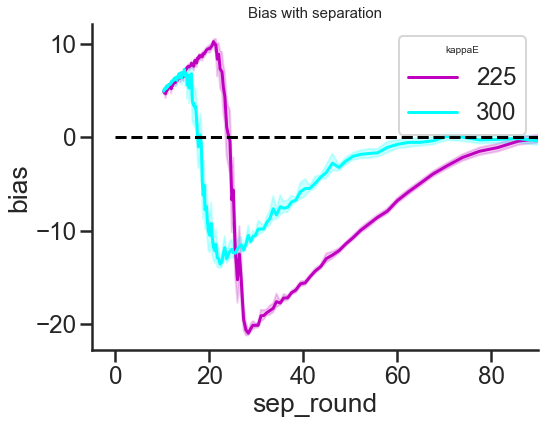

In [7]:
df['sep_round']=df.separation.round(1)
plt.figure(figsize=(8,6))
g = sns.lineplot( x="sep_round", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['sep_round'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1a523a567b8>,
 <a list of 2 Text xticklabel objects>)

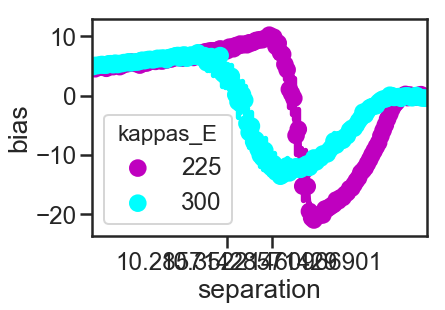

In [8]:
g = sns.pointplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], alpha=0.1, data=df, legend=False) 
# df.separation.unique()
# plt.xlim(70,90)
plt.xticks([60,80])

In [ ]:
df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225)].separat

In [136]:
plt.plot( df.loc[df['kappas_E']==225, 'separation'], df.loc[df['kappas_E']==225, 'bias'], 'ro' , markersize=1, label='225')

plt.plot( df.loc[df['kappas_E']==300, 'separation'], df.loc[df['kappas_E']==300, 'bias'], 'bo', markersize=1, label='300' )

plt.xlim(10,50)
plt.ylim(-25,15)
plt.legend()

In [125]:
df.kappas

bias  kappas_E  kappas_I  separation  success  sep_round
0     -3.803062       300        30  240.000000     True      240.0
1     -1.044923       300        30  208.715953     True      208.7
2     -0.506969       300        30  184.647160     True      184.6
3      1.815913       300        30  165.555556     True      165.6
4      0.430735       300        30  150.041958     True      150.0
5     -0.217972       300        30  137.186701     True      137.2
6      3.369657       300        30  126.360424     True      126.4
7      0.168016       300        30  117.117904     True      117.1
8      2.064585       300        30  109.135300     True      109.1
9      0.865999       300        30  102.171429     True      102.2
10    -3.721289       300        30   96.042972     True       96.0
11     2.574660       300        30   90.608108     True       90.6
12     0.380283       300        30   85.755396     True       85.8
13    -1.301163       300        30   81.396055     True       81.4
14    -2.490150       300        30   77.458484     True       77.5
15    -2.760392       300        30   73.884298     True       73.9
16    -0.901861       300        30   70.625411     True       70.6
17    -4.591709       300        30   67.641866     True       67.6
18    -3.016528       300        30   64.900181     True       64.9
19    -3.572987       300        30   62.372093     True       62.4
21     2.890139       300        30   57.864078     True       57.9
23     0.341418       300        30   53.963783     True       54.0
24     0.208056       300        30   52.204380     True       52.2
25    -2.949231       300        30   50.556079     True       50.6
26    -1.422909       300        30   49.008680     True       49.0
27    -3.502330       300        30   47.553191     True       47.6
28    -3.023311       300        30   46.181662     True       46.2
29    -5.620124       300        30   44.887029     True       44.9
30    -5.827871       300        30   43.663004     True       43.7
31    -3.881146       300        30   42.503962     True       42.5
...         ...       ...       ...         ...      ...        ...
29970  6.320255       225        15   12.640509     True       12.6
29971  6.270751       225        15   12.541501     True       12.5
29972  6.222016       225        15   12.444032     True       12.4
29973 -1.192749       225        15   12.348066     True       12.3
29974  6.126785       225        15   12.253569     True       12.3
29975 -0.527455       225        15   12.160508     True       12.2
29976  6.034425       225        15   12.068849     True       12.1
29977  5.989281       225        15   11.978562     True       12.0
29978  5.944808       225        15   11.889615     True       11.9
29979  5.900990       225        15   11.801980     True       11.8
29980  5.857814       225        15   11.715627     True       11.7
29981  5.815265       225        15   11.630529     True       11.6
29982  5.773329       225        15   11.546658     True       11.5
29983  5.731994       225        15   11.463988     True       11.5
29984  5.691247       225        15   11.382493     True       11.4
29985  5.651075       225        15   11.302149     True       11.3
29986  5.611466       225        15   11.222931     True       11.2
29987 -1.440958       225        15   11.144816     True       11.1
29988  5.533890       225        15   11.067781     True       11.1
29989  5.495902       225        15   10.991803     True       11.0
29990  5.458431       225        15   10.916862     True       10.9
29991  5.421468       225        15   10.842935     True       10.8
29992 -1.424919       225        15   10.770003     True       10.8
29993  5.349023       225        15   10.698045     True       10.7
29994  5.313522       225        15   10.627043     True       10.6
29995  5.278488       225        15   10.556977     True       10.6
29996  5.243914       225        15   10.487829     True       10.5

In [64]:
[ [df.loc[(df['sep_round']==x) & (df['kappas_E']==300), 'bias' ].mean(), x] for x in df.sep_round.unique()]

[[-0.4207394503132047, 240.0],
 [-0.3911341985767195, 208.7],
 [-0.33620565134618297, 184.6],
 [-0.22708759015268884, 165.6],
 [0.04317826394907486, 150.0],
 [-0.04913742855576688, 137.2],
 [-0.3399863925048575, 126.4],
 [-0.20742178994160848, 117.1],
 [-0.010688770942515226, 109.1],
 [-0.03600021138566082, 102.2],
 [-0.1008206021618152, 96.0],
 [-0.42945342085502536, 90.6],
 [-0.14249351034546331, 85.8],
 [-0.23404359600598088, 81.4],
 [-0.2885005637123099, 77.5],
 [0.008659864509602008, 73.9],
 [0.08714279862321019, 70.6],
 [-0.38650715826271714, 67.6],
 [-0.5508480669615581, 64.9],
 [-0.5541511158101781, 62.4],
 [-1.0918351244499298, 57.9],
 [-1.7447473689460844, 54.0],
 [-1.8348363206395177, 52.2],
 [-2.0394502722398795, 50.6],
 [-2.5793331882247115, 49.0],
 [-3.237281422596096, 47.6],
 [-2.778165921556942, 46.2],
 [-3.7760990796893528, 44.9],
 [-4.284047517757358, 43.7],
 [-4.937633176919562, 42.5],
 [-5.482869730083753, 41.4],
 [-5.829583486384109, 39.4],
 [-6.732714751532252, 38

In [63]:
[ [df.loc[(df['sep_round']==x) & (df['kappas_E']==225), 'bias' ].mean(), x] for x in df.sep_round.unique()]

[[-0.13164646302821081, 240.0],
 [-0.20196978342761024, 208.7],
 [0.18460776089226422, 184.6],
 [0.08029409752492594, 165.6],
 [-0.20013423579414535, 150.0],
 [-0.13604572361499195, 137.2],
 [-0.13148478916030404, 126.4],
 [0.12466846207706775, 117.1],
 [-0.3107137757375322, 109.1],
 [0.23193646588841638, 102.2],
 [-0.26267885491004767, 96.0],
 [-0.13013964752362453, 90.6],
 [-0.41632319933919626, 85.8],
 [-1.1082465428516188, 81.4],
 [-1.5065012645129268, 77.5],
 [-2.168484602635047, 73.9],
 [-3.061704403358798, 70.6],
 [-3.9372918068995206, 67.6],
 [-4.937043354861291, 64.9],
 [-5.846208842028107, 62.4],
 [-7.909031615557824, 57.9],
 [-9.275391646434619, 54.0],
 [-9.967527750245575, 52.2],
 [-10.745352114550471, 50.6],
 [-11.436744854177864, 49.0],
 [-12.140870725012515, 47.6],
 [-12.609894928546145, 46.2],
 [-12.98253694495364, 44.9],
 [-13.844892204493718, 43.7],
 [-14.338267974598248, 42.5],
 [-14.951242809394744, 41.4],
 [-15.682010729044471, 39.4],
 [-16.357666231611123, 38.4],


In [5]:
df.sep_round.unique()

array([240. , 208.7, 184.6, 165.6, 150. , 137.2, 126.4, 117.1, 109.1,
       102.2,  96. ,  90.6,  85.8,  81.4,  77.5,  73.9,  70.6,  67.6,
        64.9,  62.4,  57.9,  54. ,  52.2,  50.6,  49. ,  47.6,  46.2,
        44.9,  43.7,  42.5,  41.4,  39.4,  38.4,  37.5,  36.7,  35.8,
        35.1,  34.3,  33.6,  32.9,  32.2,  31.6,  30.4,  29.8,  28.8,
        28.3,  27.8,  27.3,  26.8,  26. ,  25.5,  25.1,  24.8,  24. ,
        23.7,  23.3,  23. ,  22.7,  22. ,  21.7,  21.4,  21.2,  20.9,
        20.6,  20.4,  20.1,  19.8,  19.6,  19.4,  19.1,  18.9,  18.7,
        18.5,  18.3,  18.1,  17.9,  17.7,  17.5,  17.3,  17.1,  16.9,
        16.7,  16.6,  16.4,  16.2,  16.1,  15.9,  15.7,  15.6,  15.4,
        15.3,  15.2,  15. ,  14.9,  14.7,  14.6,  14.5,  14.3,  14.2,
        14.1,  14. ,  13.8,  13.7,  13.6,  13.5,  13.4,  13.3,  13.2,
        13.1,  12.9,  12.8,  12.7,  12.6,  12.5,  12.4,  12.3,  12.2,
        12.1,  12. ,  11.9,  11.8,  11.7,  11.6,  11.5,  11.4,  11.3,
        11.2,  11.1,

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


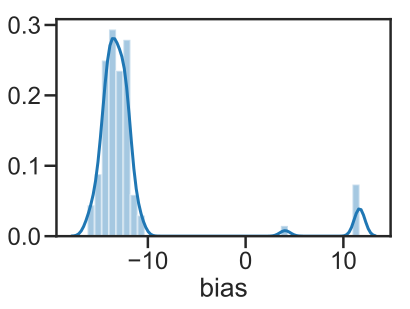

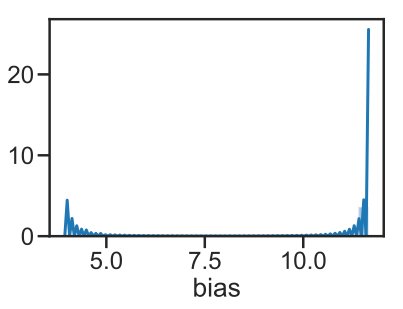

In [6]:
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==300), 'bias'])
plt.show()
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==225) & (df['bias']>0), 'bias'], bins=30)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


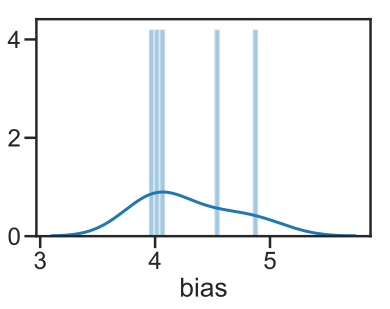

In [22]:
sns.distplot(df.loc[(df['sep_round']==23.3) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'], bins=20)

In [23]:
df['sep_round'].unique()

array([240. , 208.7, 184.6, 165.6, 150. , 137.2, 126.4, 117.1, 109.1,
       102.2,  96. ,  90.6,  85.8,  81.4,  77.5,  73.9,  70.6,  67.6,
        64.9,  62.4,  57.9,  54. ,  52.2,  50.6,  49. ,  47.6,  46.2,
        44.9,  43.7,  42.5,  41.4,  39.4,  38.4,  37.5,  36.7,  35.8,
        35.1,  34.3,  33.6,  32.9,  32.2,  31.6,  30.4,  29.8,  28.8,
        28.3,  27.8,  27.3,  26.8,  26. ,  25.5,  25.1,  24.8,  24. ,
        23.7,  23.3,  23. ,  22.7,  22. ,  21.7,  21.4,  21.2,  20.9,
        20.6,  20.4,  20.1,  19.8,  19.6,  19.4,  19.1,  18.9,  18.7,
        18.5,  18.3,  18.1,  17.9,  17.7,  17.5,  17.3,  17.1,  16.9,
        16.7,  16.6,  16.4,  16.2,  16.1,  15.9,  15.7,  15.6,  15.4,
        15.3,  15.2,  15. ,  14.9,  14.7,  14.6,  14.5,  14.3,  14.2,
        14.1,  14. ,  13.8,  13.7,  13.6,  13.5,  13.4,  13.3,  13.2,
        13.1,  12.9,  12.8,  12.7,  12.6,  12.5,  12.4,  12.3,  12.2,
        12.1,  12. ,  11.9,  11.8,  11.7,  11.6,  11.5,  11.4,  11.3,
        11.2,  11.1,

In [27]:
df.loc[(df['sep_round']>21) & (df['sep_round']<23) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'].unique()

array([4.17585725, 4.52367791, 4.01330886, 3.62750948, 4.09148561,
       5.22780844, 4.0534225 , 4.22998307, 4.14562389, 4.54999699,
       3.7545236 , 1.92436489, 3.96642665, 3.66713827, 4.0058367 ,
       3.41651922, 3.69529447, 4.07084087, 3.69568345, 4.38060337,
       3.85324434, 3.87377135, 3.51252716, 4.10725966, 4.42909561,
       3.82100367, 3.91590886, 3.76947095, 3.79094021, 4.71689947,
       3.63633281, 4.22182579, 4.51605766, 2.8034761 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


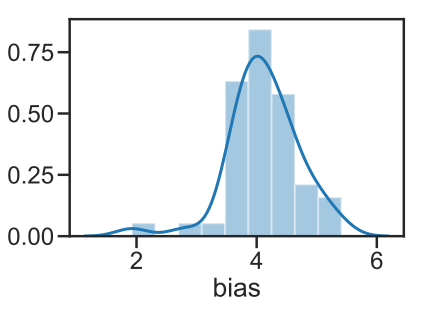

In [31]:
sns.distplot(df.loc[(df['sep_round']>21) & (df['sep_round']<24) & (df['kappas_E']==225) & (df['bias']>0) &  (df['bias']<10), 'bias'])

In [127]:
df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225)]

bias  kappas_E  kappas_I  separation  success  sep_round
15017 -4.329061       225        15   67.641866     True       67.6
15019 -6.020311       225        15   62.372093     True       62.4
15020 -3.404284       225        15   60.033576     True       60.0
15167 -2.455368       225        15   67.641866     True       67.6
15168 -4.096675       225        15   64.900181     True       64.9
15169 -4.543525       225        15   62.372093     True       62.4
15319 -5.694309       225        15   62.372093     True       62.4
15320 -6.729438       225        15   60.033576     True       60.0
15467 -4.974783       225        15   67.641866     True       67.6
15468 -6.034012       225        15   64.900181     True       64.9
15469 -7.040062       225        15   62.372093     True       62.4
15470 -7.432467       225        15   60.033576     True       60.0
15618 -5.080337       225        15   64.900181     True       64.9
15620 -6.114875       225        15   60.033576     True       60.0
15767 -1.989024       225        15   67.641866     True       67.6
15768 -5.656155       225        15   64.900181     True       64.9
15769 -5.197556       225        15   62.372093     True       62.4
15770 -6.735283       225        15   60.033576     True       60.0
15917 -4.418050       225        15   67.641866     True       67.6
15918 -2.930038       225        15   64.900181     True       64.9
15919 -8.602072       225        15   62.372093     True       62.4
15920 -7.838652       225        15   60.033576     True       60.0
16067 -5.587126       225        15   67.641866     True       67.6
16068 -3.562012       225        15   64.900181     True       64.9
16069 -5.487228       225        15   62.372093     True       62.4
16070 -8.966235       225        15   60.033576     True       60.0
16217 -2.528245       225        15   67.641866     True       67.6
16218 -3.861605       225        15   64.900181     True       64.9
16219 -6.016173       225        15   62.372093     True       62.4
16220 -4.785926       225        15   60.033576     True       60.0
...         ...       ...       ...         ...      ...        ...
28368 -2.015707       225        15   64.900181     True       64.9
28369 -7.212194       225        15   62.372093     True       62.4
28370 -9.357825       225        15   60.033576     True       60.0
28518 -3.370074       225        15   64.900181     True       64.9
28519 -5.369084       225        15   62.372093     True       62.4
28667 -6.724847       225        15   67.641866     True       67.6
28669 -4.769098       225        15   62.372093     True       62.4
28670 -6.525581       225        15   60.033576     True       60.0
28817 -4.458390       225        15   67.641866     True       67.6
28819 -5.223159       225        15   62.372093     True       62.4
28820 -7.699423       225        15   60.033576     True       60.0
28967 -2.304988       225        15   67.641866     True       67.6
28969 -8.346399       225        15   62.372093     True       62.4
29267 -4.569946       225        15   67.641866     True       67.6
29268 -5.867077       225        15   64.900181     True       64.9
29269 -6.587260       225        15   62.372093     True       62.4
29270 -7.539563       225        15   60.033576     True       60.0
29417 -4.173462       225        15   67.641866     True       67.6
29418 -5.209753       225        15   64.900181     True       64.9
29419 -4.710977       225        15   62.372093     True       62.4
29420 -8.440130       225        15   60.033576     True       60.0
29567 -5.283586       225        15   67.641866     True       67.6
29568 -5.931168       225        15   64.900181     True       64.9
29569 -6.289259       225        15   62.372093     True       62.4
29570 -6.965020       225        15   60.033576     True       60.0
29717 -4.355499       225        15   67.641866     True       67.6
29719 -3.120673       225        15   62.372093     True       62.4

-5.381488691787507
-0.5513992990140573


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


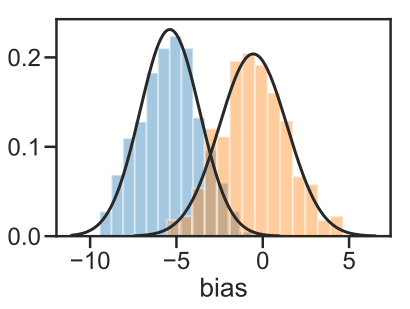

In [118]:
sns.distplot(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225), 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==300), 'bias'], kde=None, fit=norm)

print(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==225), 'bias'].mean() )
print(df.loc[(df['separation']>60) & (df['separation']<70) & (df['kappas_E']==300), 'bias'].mean() )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


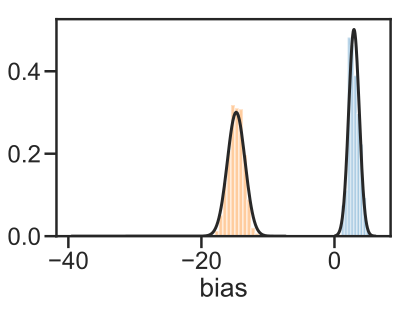

In [98]:
from scipy.stats import norm

sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225)  & (df['bias']>0)  & (df['bias']<7), 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300)  & (df['bias']<0), 'bias'], kde=None, fit=norm)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


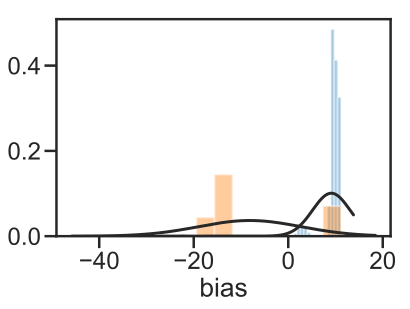

In [99]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225) , 'bias'], kde=None, fit=norm)
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300) , 'bias'], kde=None, fit=norm)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


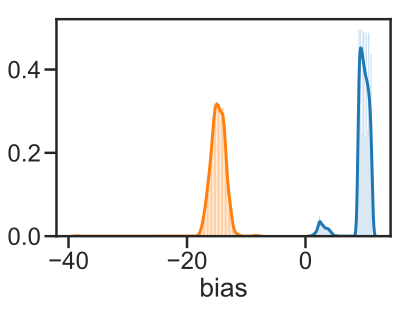

In [85]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==225)  & (df['bias']>0), 'bias'])
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<22.7) & (df['kappas_E']==300)  & (df['bias']<0)  , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


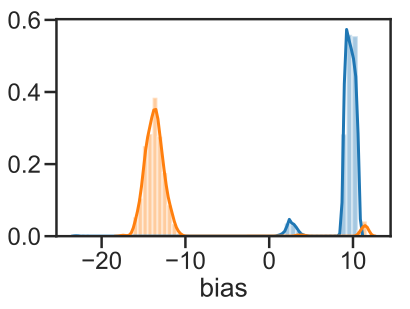

In [70]:
sns.distplot(df.loc[(df['sep_round']>17.7) & (df['sep_round']<21.4) & (df['kappas_E']==225), 'bias'])
sns.distplot(df.loc[(df['sep_round']>21.7) & (df['sep_round']<23.7) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


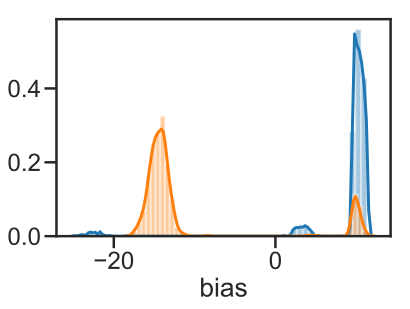

In [79]:
sns.distplot(df.loc[(df['separation']>19) & (df['sep_round']<23) & (df['kappas_E']==225), 'bias'])
sns.distplot(df.loc[(df['separation']>19) & (df['sep_round']<23) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


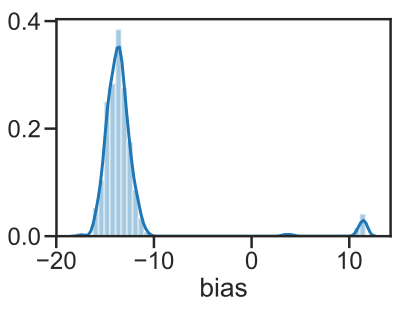

In [67]:
sns.distplot(df.loc[(df['sep_round']>21.7) & (df['sep_round']<23.7) & (df['kappas_E']==300) , 'bias'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


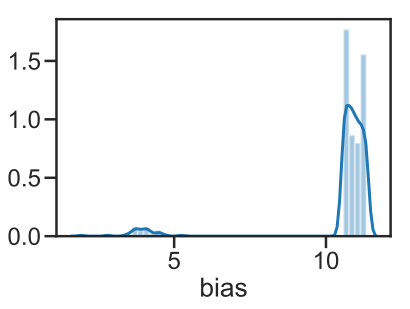

In [30]:
sns.distplot(df.loc[(df['sep_round']>21) & (df['sep_round']<23) & (df['kappas_E']==225) & (df['bias']>0), 'bias'])

In [7]:
df['separation'].max()

240.0

Plot the whole spectrum

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


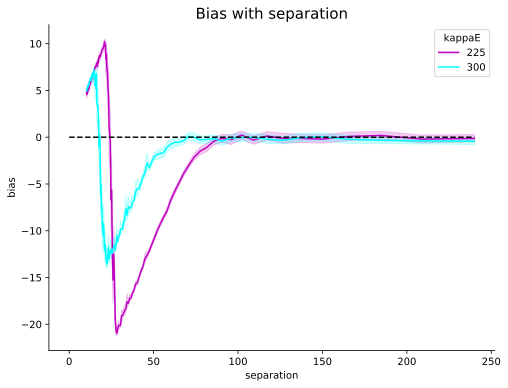

In [4]:
plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.show(block=False)


### 1 bump drift

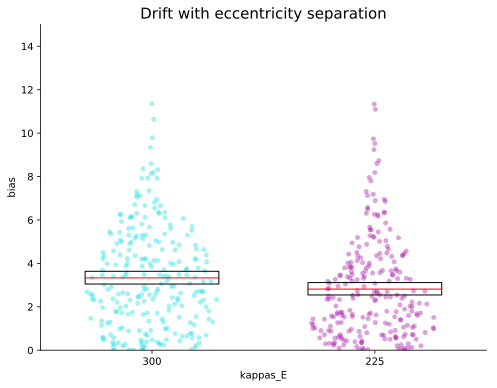

In [5]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
linares_plot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], alpha=0.4, point_size=5, df=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0, 15)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


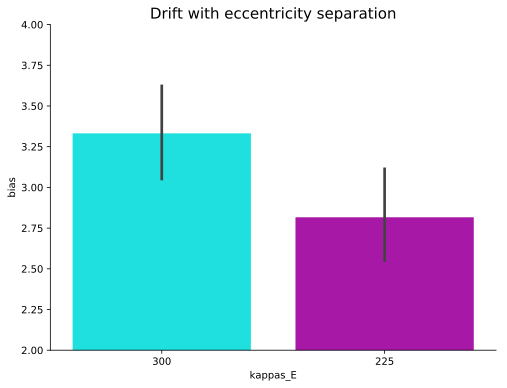

In [9]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
sns.barplot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], ci=95, data=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(2, 4)
plt.show(block=False)

#### Liniar regression (More angle error closer to center (higer kappa_E)
This happens because the bump is "thicker", so it drifts less due to noise.

In [30]:
res_m = smf.ols(formula='bias ~ kappas_E', data=df1_corr).fit()
print(res_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   bias   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.072
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0141
Time:                        12:19:26   Log-Likelihood:                -1086.2
No. Observations:                 483   AIC:                             2176.
Df Residuals:                     481   BIC:                             2185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2703      0.741      1.713      0.0

### Codes for the simulations

2 bumps interference

In [ ]:
# from model import *
# from joblib import Parallel, delayed
# import multiprocessing

# numcores = multiprocessing.cpu_count() ## run in paralel, in the cluster use all the cores available (for simulations)
# distances_test =  list(np.linspace(1.5, 35, 150))  #range(2,35)   

# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15]      

# rep_dist = 100

# n_kappas= len(kappa_e_test) # len of kappas 
# n_sepa = len(distances_test)

# separations= distances_test * rep_dist * n_kappas

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*n_sepa*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*n_sepa*rep_dist


# results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=sep, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.0, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for sep, kape, kapi in zip(separations, kappas_e, kappas_i)) 

# biases = [results[i][0] for i in range(len(results))]
# separationts = [results[i][1] for i in range(len(results))]   
# kappas__e = [results[i][2] for i in range(len(results))]      
# kappas__i = [results[i][3] for i in range(len(results))]                                                         
# succs = [results[i][6] for i in range(len(results))]   


# df=pd.DataFrame({'bias':biases, 'separation':separationts, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs })
# ### df.to_excel('/home/david/Desktop/2_bumps_interference.xlsx')

1 bump angle error (drift)

In [ ]:
# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15] 

# rep_dist = 250
# n_kappas= len(kappa_e_test)

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*rep_dist


# results2 = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=0, tauE=9, tauI=4,  n_stims=1, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for kape, kapi in zip( kappas_e, kappas_i)) 

# biases = [results2[i][0] for i in range(len(results2))]
# separationts = [results2[i][1] for i in range(len(results2))]   
# kappas__e = [results2[i][2] for i in range(len(results2))]      
# kappas__i = [results2[i][3] for i in range(len(results2))]                                                         
# succs = [results2[i][6] for i in range(len(results2))]   
# num_bumps = [results2[i][-1] for i in range(len(results2))]  


# df1=pd.DataFrame({'bias':biases, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs, 'n_bumps':num_bumps })
# ### df1.to_excel('/home/david/Desktop/1_bump_drift.xlsx')
